In [5]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1: 
__Use this dataset and two different clustering approaches (agglomerative and divisive) to group the airlines with similar safety records.__

#### Problem Statement

With the accidents involving Boeing's 737 Max, there have been speculations and concerns about airline safety. Then, there was a helicopter crash involving Kobe Bryant. Academic studies have found that high-profile crashes can shift passenger demand away from the airlines involved in the disasters.

- Should travelers avoid airlines that have had crashes in the past?

In [6]:
airsafe = pd.read_csv('/Users/jennyskytta/Desktop/Jupyter/MLProjects/Notready/airsafe.csv')
airsafe.sample(1) # look at sample of our data 

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
46,TACA,259373346,3,1,3,1,1,3


Viewing the data distribution.  I am using 2 plots to view all 6 variables 

<AxesSubplot:xlabel='fatal_accidents_85_99', ylabel='fatalities_85_99'>

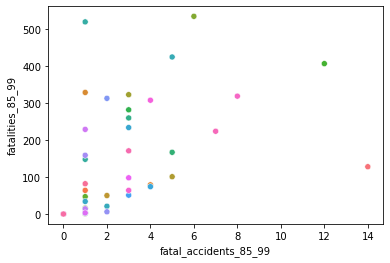

In [7]:
sns.scatterplot(x="fatal_accidents_85_99", y="fatalities_85_99", hue="airline", data=airsafe, legend = False)
# Viewing plot of past accidents from 1985 - 1999

<AxesSubplot:xlabel='fatal_accidents_00_14', ylabel='fatalities_00_14'>

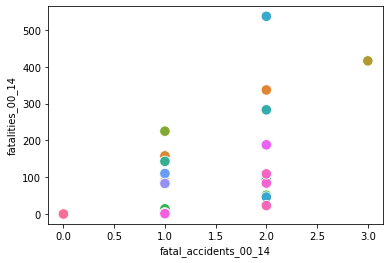

In [8]:
sns.scatterplot(x="fatal_accidents_00_14", y="fatalities_00_14", hue="airline", data=airsafe, s=110, legend = False)
# Viewing plot of more recent data from 2014

In [9]:
from sklearn.cluster import KMeans

X = airsafe[["incidents_85_99", "fatal_accidents_85_99", "fatalities_85_99", "incidents_00_14", "fatal_accidents_00_14", "fatalities_00_14"]]
m = KMeans(n_clusters=3)
_ = m.fit(X)   # fitting on all variables to see if there is a pattern - setting 4 clusters

In [10]:
kmhat = m.predict(X)
kmhat

array([0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int32)

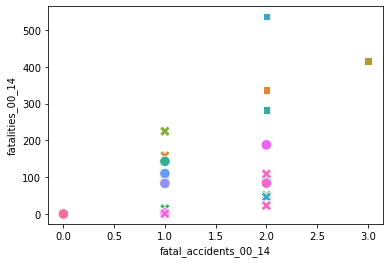

In [11]:
airsafe["kmhat"] = kmhat
scatty = sns.scatterplot(x="fatal_accidents_00_14", y="fatalities_00_14", 
                    hue="airline", style="kmhat",
                    data=airsafe, s=110,  legend = False)
plt.rcParams["figure.figsize"] = (8,5.5)

In [12]:
m.inertia_  

439687.8984962406

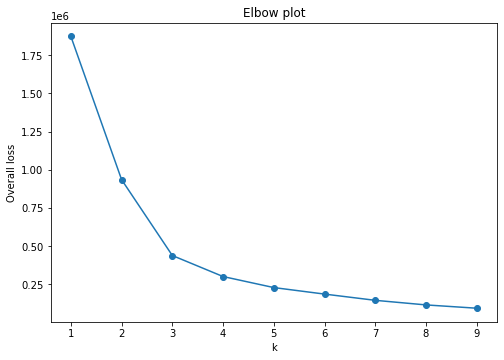

In [13]:
ks = range(1, 10)
losses = []
for k in ks:
    m = KMeans(k)
    _ = m.fit(X)
    losses.append(m.inertia_)
_ = plt.plot(ks, losses, marker="o")
plt.xlabel("k")
_ = plt.ylabel("Overall loss")
_ = plt.title("Elbow plot")  # best k was 3 which is what I chose 

In [14]:
pd.crosstab(airsafe.kmhat, airsafe.fatal_accidents_00_14, margins=True) 

fatal_accidents_00_14,0,1,2,3,All
kmhat,,,,,
0,27,8,3,0,38
1,5,4,5,0,14
2,0,0,3,1,4
All,32,12,11,1,56


#### k Means Cluster Impression
After going through this and trying to get meaning from this data when its segmented by 15 year chunks leaving me to decide which grouping to use, I came to the conclusion that I should combine the columns into larger groups by outcomes.  I believe this falls under normalization of data since it will likely help the data fall into more truthful groupings. Granted, this can only happen because I know the data labels which may not always be the case.  In this case, it seems that grouping by "incidents", "fatal accidents", and "fatalities" that are not broken down by timeframe could yeild better information.  The question posed is whether people _should_ avoid airlines that presumably fit into a death cluster.  Taking the combined data from the 80s and 2000s would yeild a more robust answer to that question.  We would be able to see if there was a cluster of more fatalities.  

In [16]:
airsafe2 = pd.read_csv('/Users/jennyskytta/Desktop/Jupyter/MLProjects/Notready/airsafe2.csv')
airsafe2.sample(1) # looking at the grouped dataset 

,airline,avail_seat_km_per_week,incidents,fatal_accidents,fatalities
57,Aeroflot*,1197672318,6,1,88


<AxesSubplot:xlabel='fatal_accidents', ylabel='fatalities'>

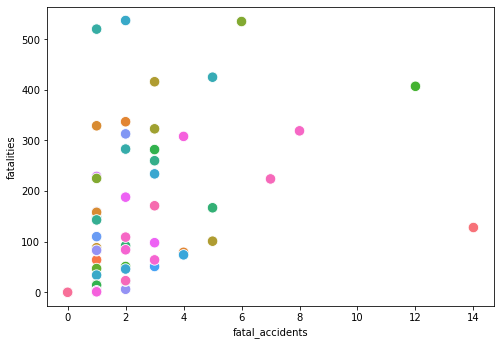

In [17]:
sns.scatterplot(x="fatal_accidents", y="fatalities", hue="airline", data=airsafe2, s=110, legend = False)
# Viewing plot of past accidents from 

In [18]:
from sklearn.cluster import KMeans

X = airsafe2[["incidents", "fatal_accidents", "fatalities"]]
m = KMeans(n_clusters=2)
_ = m.fit(X)   # fitting on all variables to see if there is a pattern - setting 4 clusters

In [19]:
kmhat = m.predict(X)

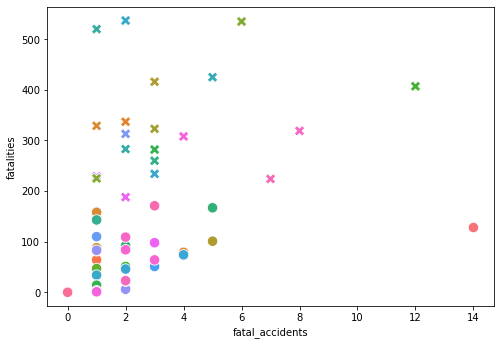

In [20]:
airsafe2["kmhat"] = kmhat
scatty = sns.scatterplot(x="fatal_accidents", y="fatalities", 
                    hue="airline", style="kmhat", legend = False,
                    data=airsafe2, s=110)
plt.rcParams["figure.figsize"] = (8,5.5)

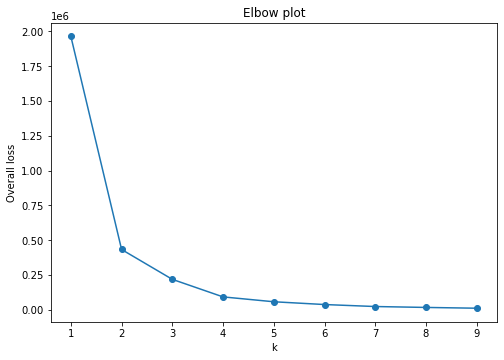

In [21]:
ks = range(1, 10)
losses = []
for k in ks:
    m = KMeans(k)
    _ = m.fit(X)
    losses.append(m.inertia_)
_ = plt.plot(ks, losses, marker="o")
plt.xlabel("k")
_ = plt.ylabel("Overall loss")
_ = plt.title("Elbow plot")  # best k here is possibly 2 OR 3 

In [22]:
m.inertia_  

11585.27902930403

In [23]:
pd.crosstab(airsafe2.kmhat, airsafe2.fatalities, margins=True) 

fatalities,0,1,2,3,4,6,7,14,16,21,...,323,329,337,407,416,425,520,535,537,All
kmhat,,,,,,,,,,,,,,,,,,,,,
0,49,3,1,3,1,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,92
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,20
All,49,3,1,3,1,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,112


### Agglomerative Clustering 

In [24]:
from sklearn.cluster import AgglomerativeClustering

# this doesn't NEED a numbered cluster BUT its hard to predict with out a number
m = AgglomerativeClustering(2)
achat = m.fit_predict(X)  # AC hat 

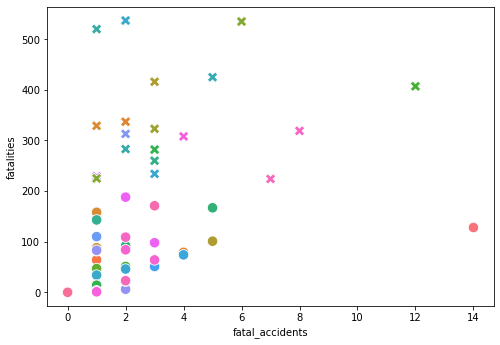

In [25]:
airsafe2["achat"] = achat
_ = sns.scatterplot(x="fatal_accidents", y="fatalities", 
                    hue="airline", style="achat",
                    data=airsafe2, s=110, legend=False)  #removing the legend/enormous and doesn't add value
plt.rcParams["figure.figsize"] = (8,5.5)

In [26]:
pd.crosstab(airsafe2.achat, airsafe2.fatalities, margins=True) 

fatalities,0,1,2,3,4,6,7,14,16,21,...,323,329,337,407,416,425,520,535,537,All
achat,,,,,,,,,,,,,,,,,,,,,
0,49,3,1,3,1,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,93
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,19
All,49,3,1,3,1,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,112


## Step 2: 
__Do these two approaches lead to the same/similar results? Provide appropriate visualizations, clustering summaries, and your interpretations.__

The 2 approaches did lead to very similar results.  The difference was only a single data point being moved from cluster 0.  Even with 3 clusters, the cluster 0 was considerably higher for fatalities or not fatalities (I honestly don't know which it is).  I do feel that breaking the data into a more complete set provided better information as once I combined them, the elbow lowered the k to 2 from 3 clusters which when comparing the outputs does truly reflect a larger disparity. The plots with 2 clusters looked very similar.  The plot with only the 2000-2014 data appeared to be grouped already into odd distributions. After normalizing this data, it does feel like we can assess that there are clearly some airlines that are more likely to have fatalities and incidents.  
